# Constable and Weiss (2006), Figure 3

Reproduced by Dieter Werthmüller ([@prisae](https://github.com/prisae)).

A marine CSEM (Controlled-Source ElectroMagnetic) example.

> **Constable, S., and C.~J. Weiss,  2006**  
> Mapping thin resistors and hydrocarbons with marine EM methods: Insights from 1d modeling.  
> Geophysics, 71, G43-G51; DOI: [10.1190/1.2187748](http://dx.doi.org/10.1190/1.2187748).

### Requirements
- `NumPy`
- `SciPy`
- `IPython`
- `Jupyter`
- `matplotlib`
- `empymod` (`pip install empymod` or `conda install -c prisae empymod`)

This example was extracted from the notebook **5a_CSEM.ipynb** in the [example-notebooks](https://github.com/empymod/example-notebooks)-repo of [empymod](https://empymod.github.io).

In [1]:
import numpy as np
from copy import deepcopy as dc
import matplotlib.pyplot as plt

import empymod as epm

In [2]:
# Plot-style adjustments
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

## Constable and Weiss (2006), Figure 3 - Original
Note: Exact reproduction is not possible, as source and receiver depths are not explicitly specified in the publication. I made a few checks, and it looks like a source-depth of 900 meter gives good accordance. Receivers are on the sea-floor.

![title](Constable2006.jpg)

### Calculation

In [3]:
# Offsets
x = np.linspace(0, 20000, 101)

# TG model
inp1 = {'src': [0, 0, 900],
        'rec': [x, np.zeros(x.shape), 1000],
        'depth': [0, 1000, 2000, 2100],
        'res': [2e14, 0.3, 1, 100, 1],
        'freqtime': 1,
        'verb': 1}

# HS model
inp2 = dc(inp1)
inp2['depth'] = inp1['depth'][:2]
inp2['res'] = inp1['res'][:3]

# Calculate radial responses
rhs = epm.dipole(**inp2)  # Step, halfspace
rhs = epm.utils.EMArray(np.nan_to_num(rhs))
rtg = epm.dipole(**inp1)  # Step, with a target
rtg = epm.utils.EMArray(np.nan_to_num(rtg))
TM, TE = epm.tmtemod.dipole(**inp2)  # Airwave; TM/TE-split only implemented for ab=11
rair = epm.utils.EMArray(np.nan_to_num(TE[0]+TE[2]+TE[3]))

# Calculate azimuthal response
ahs = epm.dipole(ab=22, **inp2)  # Step, halfspace
ahs = epm.utils.EMArray(np.nan_to_num(ahs))
atg = epm.dipole(ab=22, **inp1)  # Step, with a target
atg = epm.utils.EMArray(np.nan_to_num(atg))

* WARNING :: Offsets < 0.001 m are set to 0.001 m!
* WARNING :: Offsets < 0.001 m are set to 0.001 m!
* WARNING :: Offsets < 0.001 m are set to 0.001 m!
* WARNING :: Offsets < 0.001 m are set to 0.001 m!
* WARNING :: Offsets < 0.001 m are set to 0.001 m!


### Plot

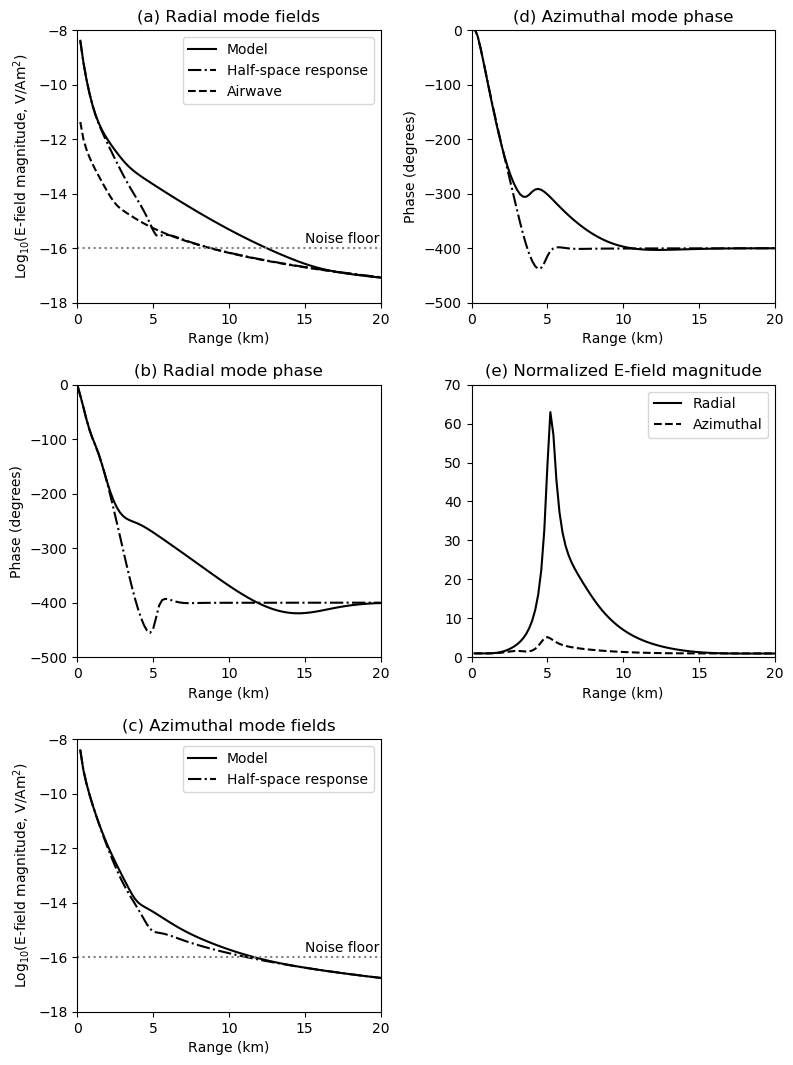

In [4]:
plt.figure(figsize=(9, 13))
plt.subplots_adjust(wspace=.3, hspace=.3)

# Radial amplitude
plt.subplot(321)
plt.title('(a) Radial mode fields')
plt.plot(x/1000, np.log10(rtg.amp), 'k', label='Model')
plt.plot(x/1000, np.log10(rhs.amp), 'k-.', label='Half-space response')
plt.plot(x/1000, np.log10(rair.amp), 'k--', label='Airwave')
plt.axhline(-16, 0, 20, c='.5', ls=':')
plt.annotate('Noise floor', (15, -15.8))
plt.axis([0, 20, -18, -8])
plt.xlabel('Range (km)')
plt.ylabel(r'Log$_{10}$(E-field magnitude, V/Am$^2$)')
plt.legend()

# Radial phase
plt.subplot(323)
plt.title('(b) Radial mode phase')
plt.plot(x/1000, rtg.pha, 'k')
plt.plot(x/1000, rhs.pha, 'k-.')
plt.axis([0, 20, -500, 0])
plt.xlabel('Range (km)')
plt.ylabel('Phase (degrees)')


# Azimuthal amplitude
plt.subplot(325)
plt.title('(c) Azimuthal mode fields')
plt.plot(x/1000, np.log10(atg.amp), 'k', label='Model')
plt.plot(x/1000, np.log10(ahs.amp), 'k-.', label='Half-space response')
plt.annotate('Noise floor', (15, -15.8))
plt.axhline(-16, 0, 20, c='.5', ls=':')
plt.axis([0, 20, -18, -8])
plt.xlabel('Range (km)')
plt.ylabel(r'Log$_{10}$(E-field magnitude, V/Am$^2$)')
plt.legend()

# Azimuthal phase
plt.subplot(322)
plt.title('(d) Azimuthal mode phase')
plt.plot(x/1000, atg.pha+180, 'k')
plt.plot(x/1000, ahs.pha+180, 'k-.')
plt.axis([0, 20, -500, 0])
plt.xlabel('Range (km)')
plt.ylabel('Phase (degrees)')


# Normalized
plt.subplot(324)
plt.title('(e) Normalized E-field magnitude')
plt.plot(x/1000, np.abs(rtg/rhs), 'k', label='Radial')
plt.plot(x/1000, np.abs(atg/ahs), 'k--', label='Azimuthal')
plt.axis([0, 20, 0, 70])
plt.xlabel('Range (km)')
plt.legend()

plt.show()

Figure 3. (a, b) Radial and (c, d) azimuthal mode CSEM amplitudes and phases as a function of source–receiver range at a frequency of 1 Hz, calculated for the model shown in (f) with (model) and without (half-space) the thin resistive layer. In (e) we show the radial and azimuthal field amplitudes normalized by the response of the half-space.

In [5]:
epm.versions('HTML')